In [17]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
data_frame = pd.read_csv("T40.4_nationwide.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [19]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [20]:
CF2 = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2 = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CF = data_frame[(data_frame["Gender"] == "Female")] [["Year", "Crude Rate"]].astype(float) 
CM = data_frame[(data_frame["Gender"] == "Male")][["Year", "Crude Rate"]].astype(float)
CF2_covid = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2_covid = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

In [21]:
x1=CF2["Year"]
x1c=CF["Year"]
y1=CF2["Crude Rate"]

x2=CM2["Year"]
x2c=CM["Year"]
y2=CM2["Crude Rate"]

xr=CM2["Year"]
yr=CM2["Crude Rate"].div(CF2["Crude Rate"].values)

In [22]:
coeffF = np.polyfit(x1, y1, 2)
yfitF = np.polyval(coeffF,x1)
resF = np.sum((y1  - yfitF)**2)
coeffM = np.polyfit(x2, y2, 2)
yfitM = np.polyval(coeffM,x2)
resM = np.sum((y2  - yfitM)**2)

stdF = np.sqrt(resF/5)
stdM = np.sqrt(resM/5)

percent off female =  21    25.889328
Name: Crude Rate, dtype: float64
percent off male =  22    28.282828
Name: Crude Rate, dtype: float64


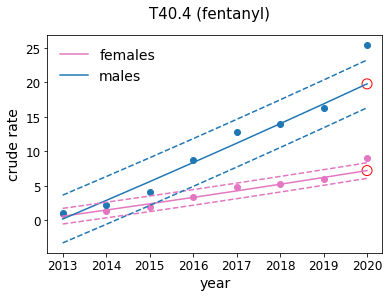

In [23]:
plt.plot(x1c, np.polyval(coeffF,x1c), color='tab:pink')
plt.scatter(x1,y1, color='tab:pink')
plt.scatter(2020.0, CF2_covid["Crude Rate"], color='tab:pink')
plt.scatter(2020.0, np.polyval(coeffF,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x1c, np.polyval(coeffM,x1c), color='tab:blue')
plt.scatter(x2,y2, color='tab:blue')
plt.legend(["Crude Rate Females", "Crude Rate Males"])
plt.scatter(2020.0, CM2_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffM,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2c, np.polyval(coeffF,x1c)+3*stdF, color='tab:pink' , linestyle='dashed')
plt.plot(x2c, np.polyval(coeffF,x1c)-3*stdF, color='tab:pink', linestyle='dashed')
plt.plot(x2c, np.polyval(coeffM,x1c)+3*stdM, color='tab:blue', linestyle='dashed')
plt.plot(x2c, np.polyval(coeffM,x1c)-3*stdM, color='tab:blue', linestyle='dashed')

print('percent off female = ',(CF2_covid["Crude Rate"]/np.polyval(coeffF,2020)-1)*100)
print('percent off male = ',(CM2_covid["Crude Rate"]/np.polyval(coeffM,2020)-1)*100)
plt.suptitle('T40.4 (fentanyl)', fontsize=15)
plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.legend(["females", "males"], frameon=False, fontsize=14)
plt.savefig("40.4_MF_USA.svg")